In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [6]:
data = './data/paper-substitution.csv'

df = pd.read_csv(data)
col_names = ['front_sheet-P', 'c_wave-P', 'middle_sheet-P', 'b_wave-P', 'back_sheet-P', 'front_sheet-O', 'c_wave-O', 'middle_sheet-O', 'b_wave-O', 'back_sheet-O']


df.columns = col_names

paper_part = 'front_sheet'

In [7]:
X = df[[col for col in col_names if f'{paper_part}-P' not in col]].copy()
y = df[f'{paper_part}-P'].copy()
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

import category_encoders as ce
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=[f'{paper_part}-O'])



X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

#Yagdrasil

In [19]:
import ydf  # Yggdrasil Decision Forests
import pandas as pd  # We use Pandas to load small datasets

input =  ['front_sheet-P', 'c_wave-P', 'middle_sheet-P', 'b_wave-P', 'back_sheet-P']

df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

model = {}

for paper in input:
    model[paper] = ydf.GradientBoostedTreesLearner(label=f'{paper}').train(df_train)
    model[paper].save(f"order_optimization\modules\yggdrasil_models\{paper}")
    evaluation = model[paper].evaluate(df_test)
    # Query individual evaluation metrics
    print(f"{paper}test accuracy: {evaluation.accuracy}")




Train model on 12844 examples
Model trained in 0:00:07.541711
front_sheet-Ptest accuracy: 0.954954954954955
Train model on 12844 examples
Model trained in 0:00:02.962248
c_wave-Ptest accuracy: 0.9846688794057216
Train model on 12844 examples
Model trained in 0:00:05.622367
middle_sheet-Ptest accuracy: 0.9987355776829461
Train model on 12844 examples
Model trained in 0:00:05.861952
b_wave-Ptest accuracy: 0.9984194721036826
Train model on 12844 examples
Model trained in 0:00:09.200441
back_sheet-Ptest accuracy: 0.9634898055950688


In [14]:
evaluation = model.evaluate(df_test)

# Query individual evaluation metrics
print(f"test accuracy: {evaluation.accuracy}")


test accuracy: 0.954954954954955
Full evaluation report:


Label \ Pred,KS231,KS161,KB230,KS121,KB160,KB120,KAC125,CM85,CM97,KI128,KA125,CM127,KAC185,KA185,KAC155,KAV150,KL250,KA155,KL125,WLK154,KI158,KAC225,KL205,KI188,KA225,KAP185,KAV185,WLK174,CM112,KM150,CM100,KAV230,KM120
KS231,2727,19,5,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3,0,0,0,2,0,0,0,0,0
KS161,12,1112,9,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
KB230,25,6,538,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
KS121,0,6,0,450,2,6,7,0,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
KB160,57,19,19,7,386,0,1,0,2,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
KB120,0,0,0,1,3,149,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KAC125,0,0,0,0,0,1,155,0,0,3,11,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
CM85,0,0,0,0,0,0,0,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CM97,0,0,0,0,2,0,0,0,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
KI128,0,0,0,0,0,1,3,0,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
model.analyze(df_test, sampling=0.1)

sci-kit learn

In [2]:
# instantiate the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

NameError: name 'X_train' is not defined

In [12]:
test_data = {
    f'{paper_part}-O': ['CM127     '],
}

test = pd.DataFrame(test_data)
print(test)

X = encoder.transform(test)

first_row = X.iloc[0]
print(first_row)
print(rfc_100.predict([first_row]))


import joblib
joblib.dump(rfc_100, f'{paper_part}P_randomforest.joblib')

  front_sheet-O
0    CM127     
front_sheet-O    8
Name: 0, dtype: int64
['KS121     ']


c:\Users\user\Desktop\paper_cutting_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['front_sheetP_randomforest.joblib']

In [13]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [14]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

front_sheet-O    1.0
dtype: float64

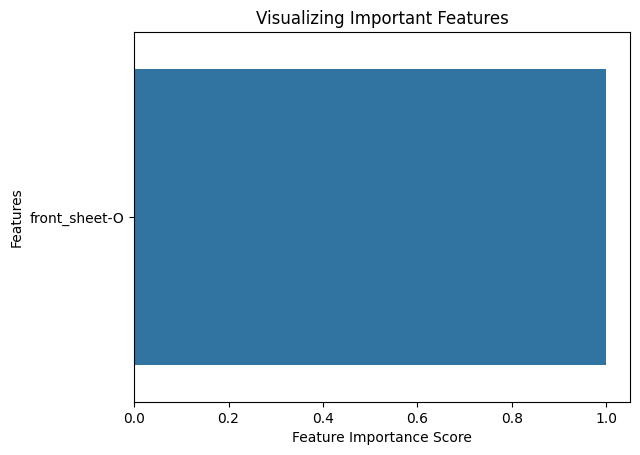

In [15]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()